# Parenteral Dataset Quality Analysis

This notebook analyzes the quality and characteristics of the parenteral medication image dataset.

**Objectives:**
1. Generate statistical analysis of image properties
2. Identify missing or inconsistent data
3. Create visualizations of dataset distribution
4. Document data quality findings

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Optional: Set style for visualizations
plt.rcParams['figure.figsize'] = [12, 6]

## 1. Data Loading and Initial Inspection

In [11]:
!pwd

/Users/marcus/Desktop/projects/parenteral_ai/parenteral/preprocessing


In [13]:
# Load the dataset
df = pd.read_csv('../data/metadata/parenteral_metadata.csv')

print(f"Dataset shape: {df.shape}")
print("\nColumn info:")
df.info()

Dataset shape: (4431, 11)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       4431 non-null   object 
 1   file_name      4431 non-null   object 
 2   relative_path  4431 non-null   object 
 3   image_width    4431 non-null   int64  
 4   image_height   4431 non-null   int64  
 5   image_format   4431 non-null   object 
 6   file_size_kb   4431 non-null   float64
 7   date_added     4431 non-null   object 
 8   last_modified  4431 non-null   object 
 9   notes          0 non-null      float64
 10  concentration  3446 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 380.9+ KB


## 2. Image Properties Analysis

Dimension Statistics:
             Width       Height
count  4431.000000  4431.000000
mean   1197.124577  1307.860528
std    1167.628900   718.166202
min      25.000000    31.000000
25%     303.000000   854.000000
50%     604.000000  1193.000000
75%    1962.500000  1760.000000
max    5184.000000  3968.000000


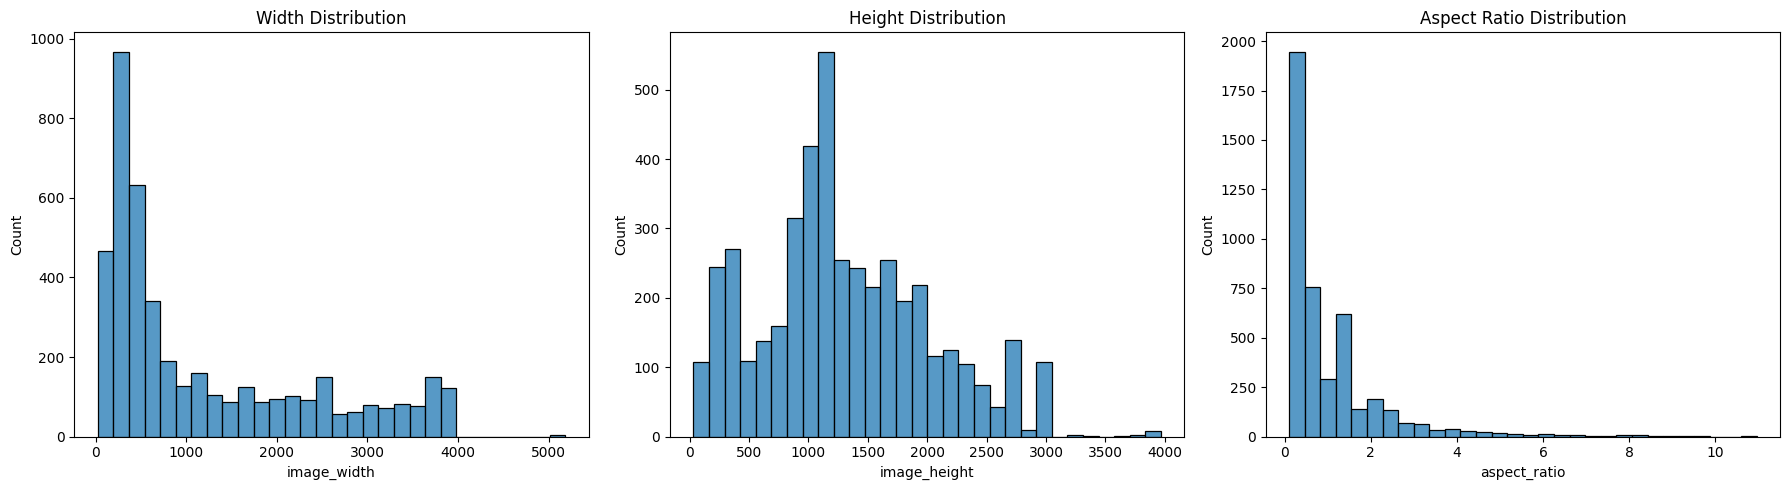

In [14]:
# Image dimensions analysis
def analyze_image_dimensions(df):
    dim_stats = pd.DataFrame({
        'Width': df['image_width'].describe(),
        'Height': df['image_height'].describe()
    })
    
    # Calculate aspect ratios
    df['aspect_ratio'] = df['image_width'] / df['image_height']
    
    # Plot dimension distributions
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    
    sns.histplot(data=df, x='image_width', bins=30, ax=ax1)
    ax1.set_title('Width Distribution')
    
    sns.histplot(data=df, x='image_height', bins=30, ax=ax2)
    ax2.set_title('Height Distribution')
    
    sns.histplot(data=df, x='aspect_ratio', bins=30, ax=ax3)
    ax3.set_title('Aspect Ratio Distribution')
    
    plt.tight_layout()
    
    return dim_stats

dim_stats = analyze_image_dimensions(df)
print("Dimension Statistics:")
print(dim_stats)

In [ ]:
# Image format and file size analysis
def analyze_image_formats(df):
    # Format distribution
    format_dist = df['image_format'].value_counts()
    
    # File size statistics by format
    size_by_format = df.groupby('image_format')['file_size_kb'].describe()
    
    # Visualize format distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    format_dist.plot(kind='bar', ax=ax1)
    ax1.set_title('Image Format Distribution')
    ax1.set_ylabel('Count')
    
    sns.boxplot(data=df, x='image_format', y='file_size_kb', ax=ax2)
    ax2.set_title('File Size Distribution by Format')
    ax2.set_ylabel('File Size (KB)')
    
    plt.tight_layout()
    
    return format_dist, size_by_format

format_dist, size_by_format = analyze_image_formats(df)
print("Format Distribution:")
print(format_dist)
print("\nFile Size Statistics by Format:")
print(size_by_format)

## 3. Missing and Inconsistent Data Analysis

In [15]:
def analyze_data_quality(df):
    # Missing values analysis
    missing_vals = df.isnull().sum()
    missing_percentages = (missing_vals / len(df) * 100).round(2)
    
    # Identify duplicate files
    duplicates = df[df.duplicated(subset=['file_name'], keep=False)]
    
    # Check for inconsistent dates
    df['date_added'] = pd.to_datetime(df['date_added'])
    df['last_modified'] = pd.to_datetime(df['last_modified'])
    date_issues = df[df['last_modified'] > df['date_added']]
    
    # Check for unusual dimensions or file sizes
    size_outliers = df[df['file_size_kb'] > df['file_size_kb'].quantile(0.99)]
    dimension_outliers = df[
        (df['image_width'] > df['image_width'].quantile(0.99)) |
        (df['image_height'] > df['image_height'].quantile(0.99))
    ]
    
    return {
        'missing_vals': pd.DataFrame({'Count': missing_vals, 'Percentage': missing_percentages}),
        'duplicate_count': len(duplicates),
        'date_issues_count': len(date_issues),
        'size_outliers': len(size_outliers),
        'dimension_outliers': len(dimension_outliers)
    }

quality_metrics = analyze_data_quality(df)
print("Missing Values Analysis:")
print(quality_metrics['missing_vals'])
print(f"\nNumber of duplicate files: {quality_metrics['duplicate_count']}")
print(f"Number of date inconsistencies: {quality_metrics['date_issues_count']}")
print(f"Number of file size outliers: {quality_metrics['size_outliers']}")
print(f"Number of dimension outliers: {quality_metrics['dimension_outliers']}")

Missing Values Analysis:
               Count  Percentage
category           0        0.00
file_name          0        0.00
relative_path      0        0.00
image_width        0        0.00
image_height       0        0.00
image_format       0        0.00
file_size_kb       0        0.00
date_added         0        0.00
last_modified      0        0.00
notes           4431      100.00
concentration    985       22.23
aspect_ratio       0        0.00

Number of duplicate files: 0
Number of date inconsistencies: 0
Number of file size outliers: 45
Number of dimension outliers: 16


## 4. Dataset Distribution Analysis

Category Distribution Summary:
Total number of categories: 413

Top 10 categories:
category
Ondansetron      91
Sodium           73
Fentanyl         50
Levofloxacin     49
Hydralazine      47
Levetiracetam    44
Atropine         43
Heparin          43
Calcium          42
Potassium        42
Name: count, dtype: int64


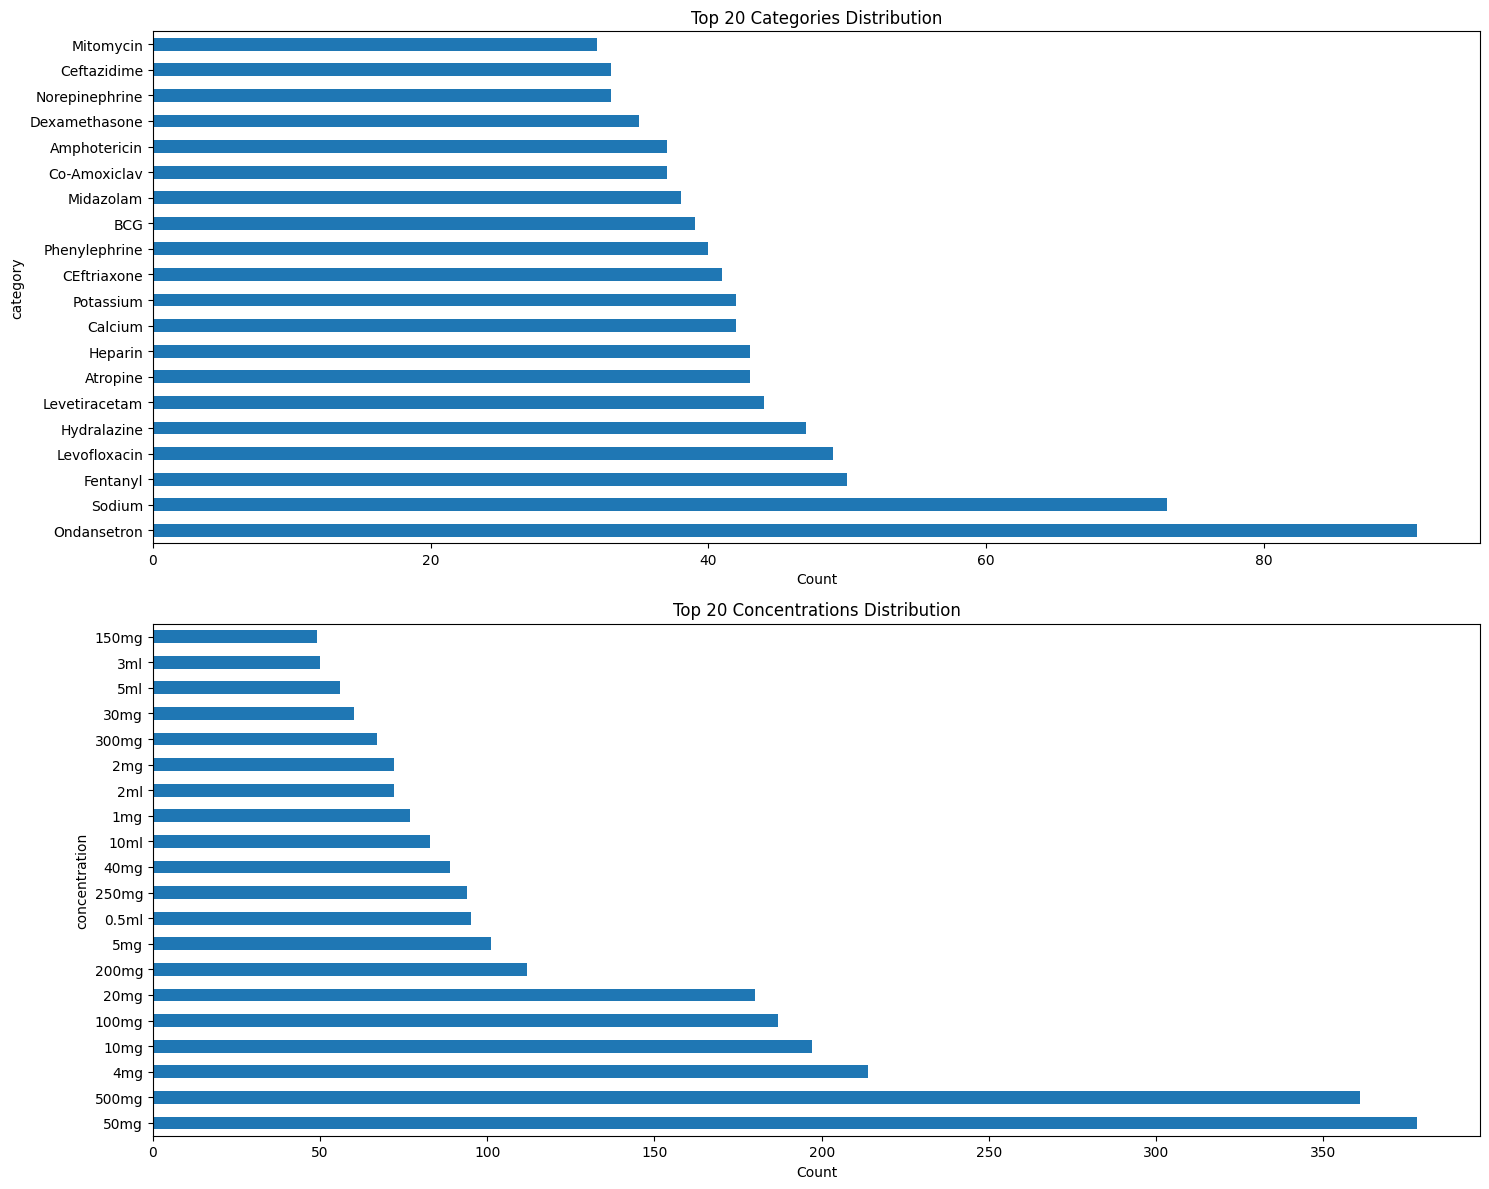

In [16]:
def analyze_dataset_distribution(df):
    # Category distribution
    category_dist = df['category'].value_counts()
    
    # Concentration distribution
    concentration_dist = df['concentration'].value_counts()
    
    # Visualize distributions
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot top 20 categories
    category_dist.head(20).plot(kind='barh', ax=ax1)
    ax1.set_title('Top 20 Categories Distribution')
    ax1.set_xlabel('Count')
    
    # Plot top 20 concentrations
    concentration_dist.head(20).plot(kind='barh', ax=ax2)
    ax2.set_title('Top 20 Concentrations Distribution')
    ax2.set_xlabel('Count')
    
    plt.tight_layout()
    
    return category_dist, concentration_dist

category_dist, concentration_dist = analyze_dataset_distribution(df)
print("Category Distribution Summary:")
print(f"Total number of categories: {len(category_dist)}")
print("\nTop 10 categories:")
print(category_dist.head(10))

## 5. Data Quality Summary Report

In [17]:
def generate_quality_report(df, quality_metrics):
    report = f"""
    # Dataset Quality Analysis Report
    
    ## Dataset Overview
    - Total number of images: {len(df)}
    - Number of categories: {len(df['category'].unique())}
    - Date range: {df['date_added'].min()} to {df['date_added'].max()}
    
    ## Image Properties
    - Image formats: {', '.join(df['image_format'].unique())}
    - Average dimensions: {df['image_width'].mean():.0f}x{df['image_height'].mean():.0f} pixels
    - Average file size: {df['file_size_kb'].mean():.2f} KB
    
    ## Data Quality Issues
    - Missing values: {quality_metrics['missing_vals']['Count'].sum()} total across all columns
    - Duplicate files: {quality_metrics['duplicate_count']}
    - Date inconsistencies: {quality_metrics['date_issues_count']}
    - Size outliers: {quality_metrics['size_outliers']}
    - Dimension outliers: {quality_metrics['dimension_outliers']}
    
    ## Recommendations
    1. {'Address missing values' if quality_metrics['missing_vals']['Count'].sum() > 0 else 'No major missing value issues'}
    2. {'Review and resolve duplicate files' if quality_metrics['duplicate_count'] > 0 else 'No duplicate files found'}
    3. {'Investigate date inconsistencies' if quality_metrics['date_issues_count'] > 0 else 'No date inconsistencies found'}
    4. {'Review outlier images for quality issues' if quality_metrics['size_outliers'] > 0 else 'No significant outliers found'}
    """
    
    return report

quality_report = generate_quality_report(df, quality_metrics)
print(quality_report)


    # Dataset Quality Analysis Report
    
    ## Dataset Overview
    - Total number of images: 4431
    - Number of categories: 413
    - Date range: 2025-02-17 00:00:00 to 2025-02-17 00:00:00
    
    ## Image Properties
    - Image formats: JPEG, MPO
    - Average dimensions: 1197x1308 pixels
    - Average file size: 265.03 KB
    
    ## Data Quality Issues
    - Missing values: 5416 total across all columns
    - Duplicate files: 0
    - Date inconsistencies: 0
    - Size outliers: 45
    - Dimension outliers: 16
    
    ## Recommendations
    1. Address missing values
    2. No duplicate files found
    3. No date inconsistencies found
    4. Review outlier images for quality issues
    
